1.Импортирую библиотеки

In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Создаю DataFrame с данными из Excel таблицы

In [3]:
d = pd.read_csv ('mcs_ds_edited_iter_shuffled.csv')
df = pd.DataFrame(data=d)
df.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


Строю гистограмму зависимотей аттрибута anchor_ratio к целевой переменной ale 

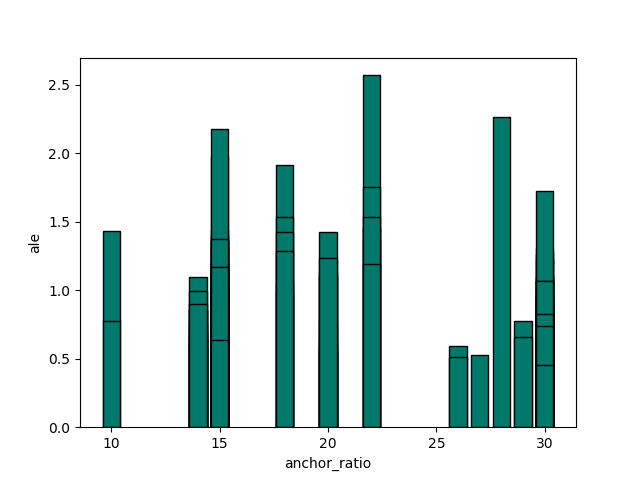

In [4]:
plt.figure()
plt.bar(df['anchor_ratio'], df['ale'], ec='black', color='#00796b')
plt.xlabel('anchor_ratio')
plt.ylabel('ale')
plt.show()

Гистограмма зависимотей аттрибута trans_range к целевой переменной ale 

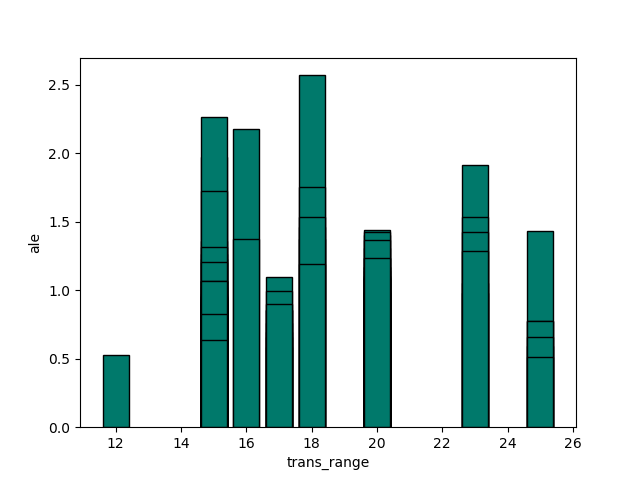

In [5]:
plt.figure()
plt.bar(df['trans_range'], df['ale'], ec='black', color='#00796b')
plt.xlabel('trans_range')
plt.ylabel('ale')
plt.show()

Гистограмма зависимотей аттрибута nody_density к целевой переменной ale 

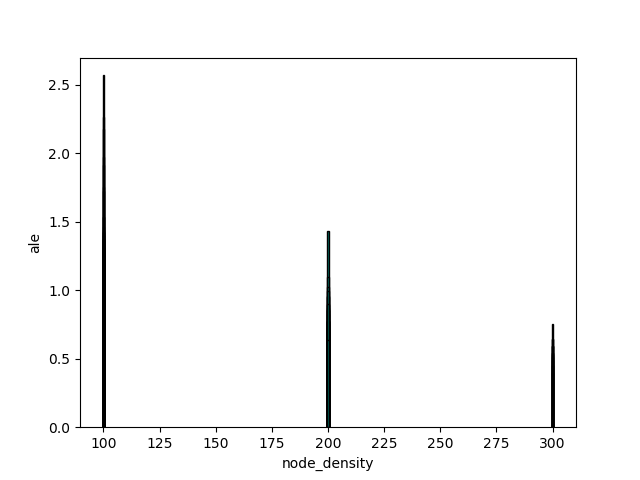

In [6]:
plt.figure()
plt.bar(df['node_density'], df['ale'], ec='black', color='#00796b')
plt.xlabel('node_density')
plt.ylabel('ale')
plt.show()

Гистограмма зависимотей аттрибута iterations к целевой переменной ale 

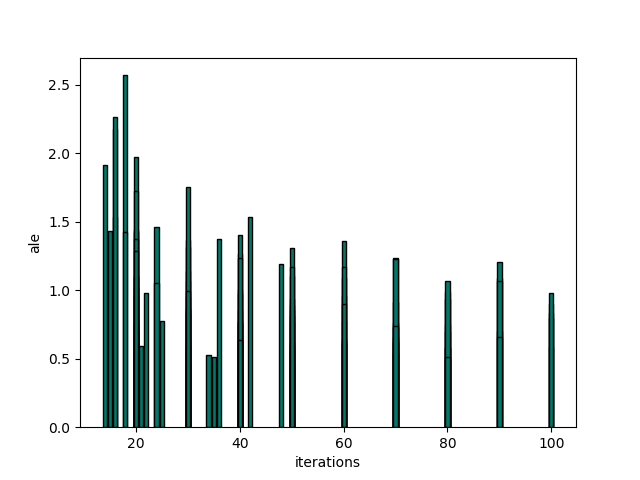

In [7]:
plt.figure()
plt.bar(df['iterations'], df['ale'], ec='black', color='#00796b')
plt.xlabel('iterations')
plt.ylabel('ale')
plt.show()

2.Вывожу корелляцию каждого из аттрибутов к целевой переменной

In [8]:
df.corr()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
anchor_ratio,1.000000,-0.094692,-0.116986,0.023167,-0.074997,-0.104657
trans_range,-0.094692,1.000000,-0.244055,-0.199315,0.109309,-0.076483
node_density,-0.116986,-0.244055,1.000000,-0.072426,-0.645927,-0.639097
iterations,0.023167,-0.199315,-0.072426,1.000000,-0.400394,-0.198966
ale,-0.074997,0.109309,-0.645927,-0.400394,1.000000,0.743958
sd_ale,-0.104657,-0.076483,-0.639097,-0.198966,0.743958,1.000000


In [9]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

Строю тепловую карту корелляций

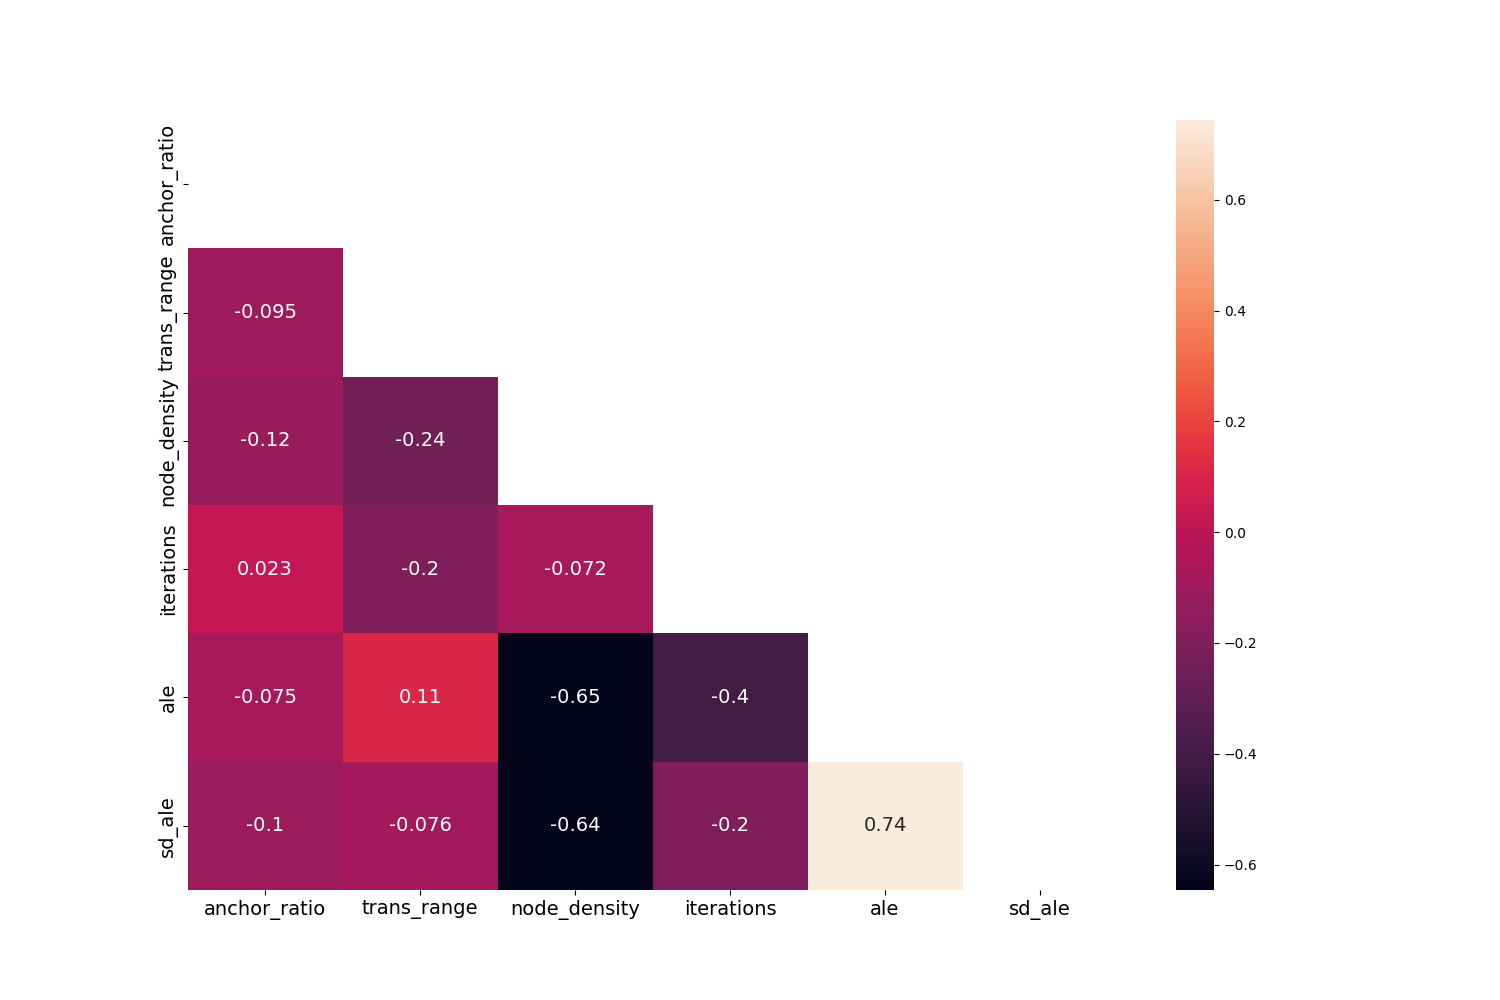

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

3.Составляю модель линейной регрессии anchor_ratio - ale (attribute - target).
  Определяю итоговый коэффициент и intercept

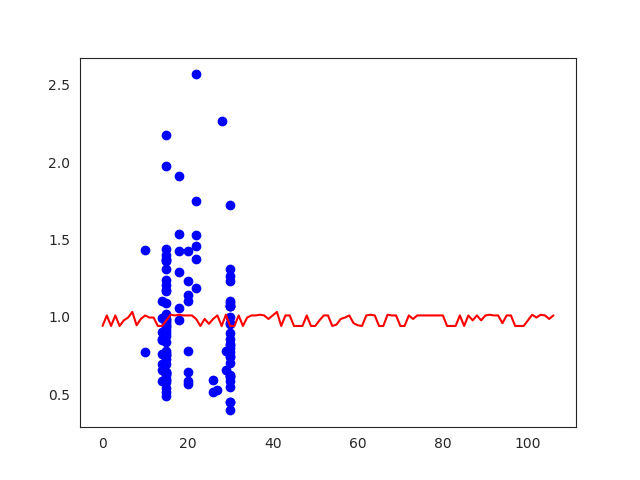

intercept: 1.0767225632713422
slope: [-0.00454369]


In [18]:
X = df[['anchor_ratio']]
y = df['ale']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.figure()
plt.scatter(X, y, color='blue')
plt.plot(y_pred, color='red')
plt.show()
print('intercept:', model.intercept_)
print('slope:', model.coef_)

Модель линейной регрессии trans_range - ale

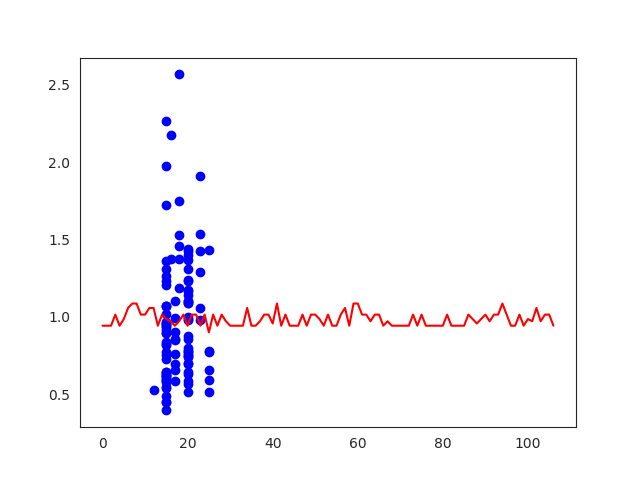

intercept: 0.7266644855844975
slope: [0.01436397]


In [19]:
X = df[['trans_range']]
y = df['ale']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.figure()
plt.scatter(X, y, color='blue')
plt.plot(y_pred, color='red')
plt.show()
print('intercept:', model.intercept_)
print('slope:', model.coef_)

Модель линейной регрессии node_density - ale

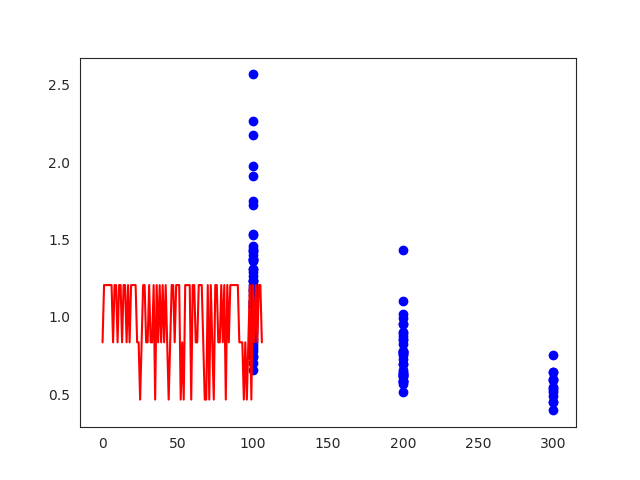

intercept: 1.57554471677975
slope: [-0.00370479]


In [21]:
X = df[['node_density']]
y = df['ale']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.figure()
plt.scatter(X, y, color='blue')
plt.plot(y_pred, color='red')
plt.show()
print('intercept:', model.intercept_)
print('slope:', model.coef_)

Модель линейной регрессии iterations - ale

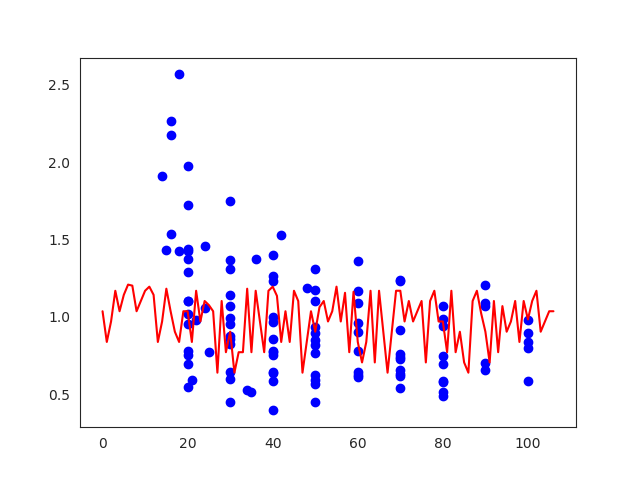

intercept: 1.3008346874270955
slope: [-0.00662723]


In [22]:
X = df[['iterations']]
y = df['ale']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.figure()
plt.scatter(X, y, color='blue')
plt.plot(y_pred, color='red')
plt.show()
print('intercept:', model.intercept_)
print('slope:', model.coef_)

Итоговый массив коэффициентов, intercept

In [49]:
data = df
d = data['ale']
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
print('coef array:', regr.coef_)

Intercept 1.8016253430435625
coef array: [-0.00888937 -0.0056821  -0.0027282  -0.00624322  0.75179939]


Я не поняла, какие значения принимают y_true и y_pred((((((
вывод mae и mse неправильный

In [29]:
y_true = np.array([])
y_pred = np.array([])
d = y_true - y_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
print("MAE:",mae_f)
print("MSE:", mse_f)

MAE: 0.5833333333333334
MSE: 0.75


Определение статистической значимости каждого параметра:

In [36]:
X_incl_const = sm.add_constant(X_train)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercepr', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data 0.727845519095376
Test data r-squared:  0.6717425658411711
Intercepr 1.8016253430435625


,coef
anchor_ratio,-0.008889
trans_range,-0.005682
node_density,-0.002728
iterations,-0.006243
sd_ale,0.751799


In [38]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.1347026130510287

In [39]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)
       for i in range(X_incl_const.shape[1])]
pd.DataFrame({'coef name': X_incl_const.columns, 'vif':np.around(vif,2)})

,coef name,vif
0,const,167.45
1,anchor_ratio,1.13
2,trans_range,1.39
3,node_density,2.33
4,iterations,1.35
5,sd_ale,2.48


BIC

In [40]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
original_coef = pd.DataFrame({'coef:':results.params, 'p-value':round(results.pvalues,3)})
print('BIC', results.bic)
print('r-squared', results.rsquared)

BIC 9.76169979982038
r-squared 0.727845519095376


In [44]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['iterations', 'node_density'], axis=1)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
reduced_coef = pd.DataFrame({'coef:':results.params, 'p-value':round(results.pvalues,3)})
print('BIC', results.bic)
print('r-squared', results.rsquared)

BIC 30.343463922887047
r-squared 0.5942007180706668


In [45]:
frames = [original_coef, reduced_coef]
pd.concat(frames, axis=1)

,coef:,p-value,coef:,p-value
const,1.801625,0.000,0.208543,0.364
anchor_ratio,-0.008889,0.049,-0.002383,0.641
trans_range,-0.005682,0.556,0.022722,0.024
node_density,-0.002728,0.000,NaN,NaN
iterations,-0.006243,0.000,NaN,NaN
sd_ale,0.751799,0.001,1.605748,0.000
